In [232]:
__author__= 'Ramda Yanurzha - ry692@nyu.edu'

In [233]:
#importing libraries
import pylab as pl
import pandas as pd
import numpy as np
import scipy.stats
import csv
import json
import urllib2
import geopandas as gp
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [234]:
#read json
url="http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/stationzips.json"
response = urllib2.urlopen(url)
stationzip = json.load(response)
print stationzip

{u'344': 11216, u'345': 10011, u'346': 10014, u'347': 10014, u'340': 10002, u'341': 10002, u'342': 10002, u'343': 11251, u'348': 10012, u'349': 10002, u'478': 10036, u'298': 11217, u'296': 10002, u'297': 10003, u'294': 10003, u'295': 10002, u'293': 10003, u'290': 10022, u'291': 10002, u'195': 10005, u'270': 11205, u'3141': 10065, u'3142': 10065, u'274': 11217, u'275': 11238, u'276': 10013, u'3147': 10028, u'3148': 10028, u'279': 10038, u'524': 10036, u'525': 10001, u'526': 10016, u'527': 10016, u'520': 10019, u'521': 10001, u'522': 10022, u'523': 10018, u'528': 10016, u'529': 10036, u'449': 10019, u'448': 10018, u'443': 11211, u'442': 10001, u'441': 10022, u'440': 10017, u'447': 10019, u'446': 10001, u'445': 10009, u'444': 10010, u'3092': 11211, u'3093': 11211, u'3090': 11211, u'3091': 11211, u'3097': 11222, u'438': 10003, u'439': 10003, u'436': 11216, u'437': 11216, u'3098': 11222, u'435': 10011, u'432': 10009, u'433': 10009, u'430': 11201, u'431': 11201, u'339': 10009, u'335': 10003,

In [235]:
#importing pluto with geopanda
pluto = gp.GeoDataFrame.from_file("Manhattan/MNMapPLUTO.shp")
print pluto['ZipCode'].head(20)

0     10002
1     10013
2     10014
3     10014
4     10012
5     10024
6     10012
7     10003
8     10013
9     10014
10    10003
11    10001
12    10013
13    10013
14    10007
15    10014
16    10002
17    10002
18    10003
19    10003
Name: ZipCode, dtype: int64


In [236]:
#check pluto column names
print pluto.columns

Index([    u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot',
              u'BBL',   u'BldgArea',  u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidF

In [237]:
#read citibike ride data, 3 months interval
df_feb=pd.read_csv('201502-citibike-tripdata.csv')
df_may=pd.read_csv('201505-citibike-tripdata.csv')
df_aug=pd.read_csv('201508-citibike-tripdata.csv')

In [238]:
#combining into one dataframe
df_all = pd.concat([df_may,df_feb,df_aug])
print df_all.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


In [264]:
#creating a zipcode column in citibike dataframe
df_all['zipcode'] = [stationzip[str(i)] for i in df_all['start station id']]
print df_all['zipcode'].head(5)


0    10018
1    10003
2    10014
3    10010
4    10013
Name: zipcode, dtype: float64


In [265]:
print df_all['zipcode']

0          10018
1          10003
2          10014
3          10010
4          10013
5          10003
6          10002
7          11211
8          10013
9          10003
10         10017
11         10014
12         10017
13         11238
14         10016
15         10009
16         10022
17         10017
18         10010
20         10011
21         10003
22         10010
24         10017
25         10019
26         10003
27         10003
28         10003
29         10003
30         10019
31         10003
           ...  
1179014    10019
1179015    10018
1179016    10017
1179017    10003
1179018    11217
1179019    10011
1179020    10281
1179021    10003
1179022    11211
1179023    10011
1179024    10016
1179025    10003
1179026    10003
1179027    10019
1179028    10016
1179029    10281
1179030    10001
1179031    10017
1179032    10001
1179033    10007
1179034    10012
1179035    10014
1179036    10014
1179037    10001
1179038    10003
1179039    11101
1179040    10016
1179041    100

zipcode
10001    173975
10002    131993
10003    246511
10004     27468
10005     29853
10007     62425
10009    112908
10010     85363
10011    198061
10012     98220
10013    110927
10014    150225
10016    134582
10017     88516
10018     68872
10019    150433
10021      1039
10022     60361
10023     18908
10036     90846
10038     37066
10065        60
10280     17406
10281      9374
10282     17348
11101      4763
11201     81365
11205     26177
11206      1813
11211     37891
11216      3930
11217     17001
11220         6
11221       215
11222      6663
11233        59
11238     10924
11251      1846
Name: start station id, dtype: int64


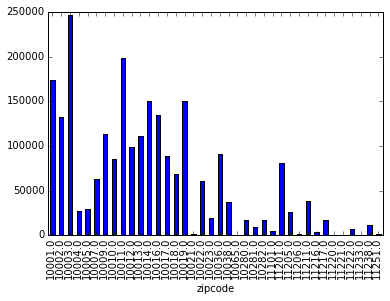

In [240]:
#noticed something, a zipcode of 83? removing it.
df_all = df_all[df_all.zipcode != 83]
ride_count = (df_all['start station id'].groupby(df_all['zipcode']).count())
print ride_count
ride_count.plot(kind='bar')

In [280]:
#removing zipcode of 0 in pluto dataframe
pluto = pluto[pluto.ZipCode != 0]
#group by zipcode, sum the residential units
bunit_zip = (pluto['UnitsRes'].groupby(pluto['ZipCode']).sum())
print len(pluto['ZipCode'].unique())
print bunit_zip.head(60)

53
ZipCode
10001    17940
10002    34505
10003    33598
10004     2409
10005     5567
10006     2704
10007     3732
10009    33130
10010    19835
10011    35200
10012    15412
10013    15330
10014    22710
10016    38272
10017    12625
10018     5677
10019    35836
10020        0
10021    30777
10022    27676
10023    41878
10024    36569
10025    47955
10026    15911
10027    28209
10028    30820
10029    34917
10030    13540
10031    22237
10032    21844
10033    20141
10034    15698
10035    16438
10036    20938
10037    10955
10038    11716
10039    11433
10040    16048
10044    11257
10065    22873
10069     4741
10075    18117
10103       61
10111        0
10112        0
10119        0
10123        0
10128    35067
10129      192
10280     5474
10281        0
10282     3157
10463     3118
Name: UnitsRes, dtype: int64


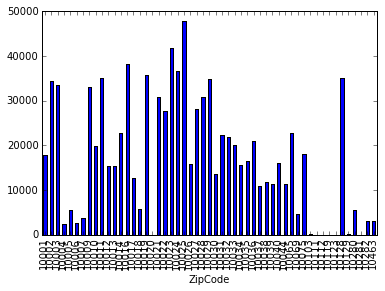

In [266]:
bunit_zip.plot(kind='bar')

In [242]:
rides_zip = pd.concat([bunit_zip,ride_count],axis=1)
rides_zip.columns = ['unitsres','ridescount']
print rides_zip

       unitsres  ridescount
10001     17940      173975
10002     34505      131993
10003     33598      246511
10004      2409       27468
10005      5567       29853
10006      2704         NaN
10007      3732       62425
10009     33130      112908
10010     19835       85363
10011     35200      198061
10012     15412       98220
10013     15330      110927
10014     22710      150225
10016     38272      134582
10017     12625       88516
10018      5677       68872
10019     35836      150433
10020         0         NaN
10021     30777        1039
10022     27676       60361
10023     41878       18908
10024     36569         NaN
10025     47955         NaN
10026     15911         NaN
10027     28209         NaN
10028     30820         NaN
10029     34917         NaN
10030     13540         NaN
10031     22237         NaN
10032     21844         NaN
...         ...         ...
10039     11433         NaN
10040     16048         NaN
10044     11257         NaN
10065     22873     

In [ ]:
#scatterplot of the new dataframe of just number of units and rides per zipcode
fig = figure(figsize=(15,15))
rides_zip.plot(kind='scatter',x='unitsres',y='ridescount')

###Regression

null hypothesis: the number of residential unit has no effect on number of citibike rides

In [270]:
#line fit
import statsmodels.api as sm
import statsmodels.formula.api as smf

#setting independent variable
X = sm.add_constant(rides_zip.unitsres)

#1-degree polynomial
fit1 = sm.OLS(rides_zip.ridescount, X, missing='drop').fit()
llf1 = fit1.llf

#2-degree polynomial
curvemodel = smf.ols(formula = "y ~ x1 + I((x1)**2) ", 
        data={'x1':rides_zip.unitsres,'y': rides_zip.ridescount}).fit()
llf2 = fit2.llf

#regression summary
print fit1.summary()
print curvemodel.summary()

                            OLS Regression Results                            
Dep. Variable:             ridescount   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     7.586
Date:                Wed, 21 Oct 2015   Prob (F-statistic):             0.0113
Time:                        21:20:45   Log-Likelihood:                -308.91
No. Observations:                  25   AIC:                             621.8
Df Residuals:                      23   BIC:                             624.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       3.487e+04   2.16e+04      1.612      0.1

       unitsres  ridescount
10001     17940      173975
10002     34505      131993
10003     33598      246511
10004      2409       27468
10005      5567       29853
10007      3732       62425
10009     33130      112908
10010     19835       85363
10011     35200      198061
10012     15412       98220
10013     15330      110927
10014     22710      150225
10016     38272      134582
10017     12625       88516
10018      5677       68872
10019     35836      150433
10021     30777        1039
10022     27676       60361
10023     41878       18908
10036     20938       90846
10038     11716       37066
10065     22873          60
10280      5474       17406
10281         0        9374
10282      3157       17348


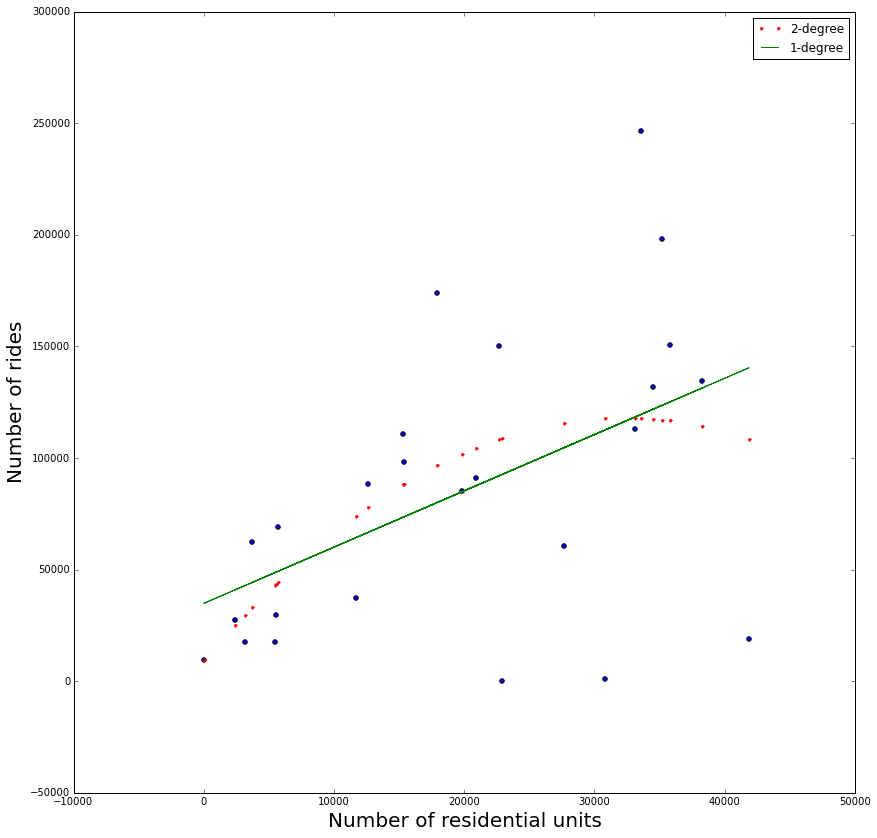

In [268]:
#removing NaN values so fit1 and dataframe have the same dimension for plot
rd2 = rides_zip[np.isfinite(rides_zip['unitsres'])]
rd2 = rd2[np.isfinite(rd2['ridescount'])]
print rd2


#plotting both
pl.figure(figsize=(14, 14))
pl.scatter(rides_zip.unitsres,rides_zip.ridescount)
plot(rd2.unitsres, curvemodel.predict(), 'r.',label="2-degree")
plot(rd2.unitsres, fit1.predict(), 'g', label="1-degree")
pl.xlabel('Number of residential units',fontsize=20)
pl.ylabel('Number of rides',fontsize=20)
pl.legend()

###Likelihood test
Degree of freedom: 1
significance value: 0.05

Null hypothesis: line fit is better
Doing both manual and compare_lr_test, chisq value for 0.05 = 3.84

In [251]:
print "LR : ", -2 * (llf1-llf2)
print curvemodel.compare_lr_test(fit1)
#dof: 1, alpha = 0.05
#based on chart, LR < chisq value
#line fit is better

LR :  1.59829836645
(1.598298366453605, 0.20614452379169013, 1.0)


##Findings

1. Based on the likelihood test, 1-degree polynomial (a line) is a better fit for the regression
2. With p-value of 0.011 in the chosen regression, the number of residential units is a good predictor

###Improvement suggestion
1. Expand the sample size to include Brooklyn since there are more residential areas there
2. A zipcode is probably too big and a lot of citibikes station located not in residential but in commercial area esp. in manhattan
3. Include only subscriber in the dataset
4. Ideas of additional variable: median income in the neighborhood